<a href="https://colab.research.google.com/github/prakriti-khadka11/Concept-and-Technologies-of-Ai/blob/main/Week4worksheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/MyDrive/data/diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

In [5]:
print("\nData Types:")
print(data.dtypes)







Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [6]:
# Check for missing values in each column.
print("\nMissing Values:")
print(data.isnull().sum())




Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# Summary statistics for numerical columns.
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000

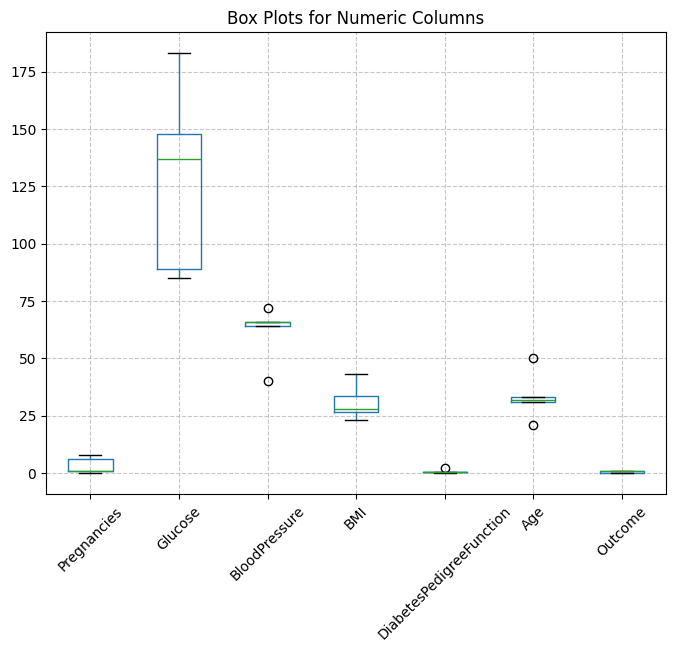

In [14]:
# Build Box plots within appropriate columns
import matplotlib.pyplot as plt
df = pd.DataFrame(data)
columns_to_fix = ['SkinThickness', 'Insulin']
df[columns_to_fix] = df[columns_to_fix].replace(0, pd.NA)
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
df.boxplot(column=numeric_columns, figsize=(8, 6))
plt.title("Box Plots for Numeric Columns")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


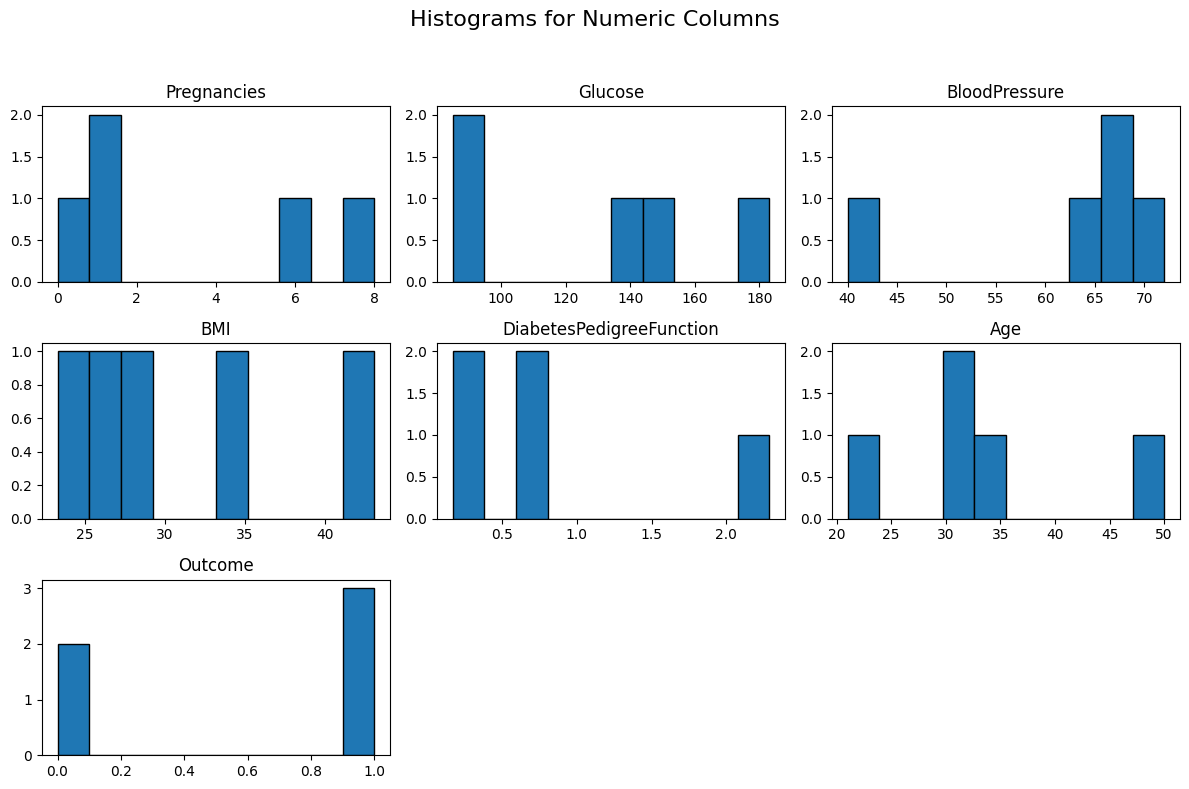

In [15]:
# Build Histograms  appropriate columns
df = pd.DataFrame(data)
columns_to_fix = ['SkinThickness', 'Insulin']
df[columns_to_fix] = df[columns_to_fix].replace(0, pd.NA)
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns].hist(bins=10, figsize=(12, 8), grid=False, edgecolor='black')
plt.suptitle("Histograms for Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<ipython-input-21-a3386e283a87>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_fix] = df[columns_to_fix].apply(lambda col: col.fillna(col.mean()))


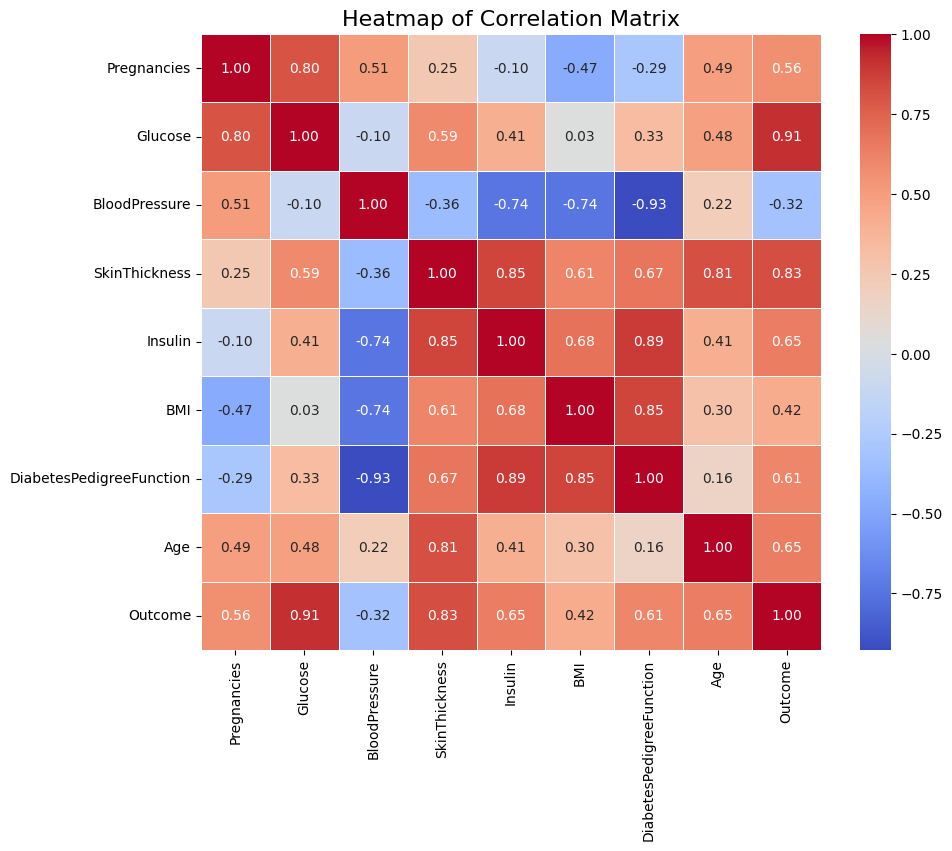

In [21]:
# Build Heatmaps for appropriate columns

import seaborn as sns
df = pd.DataFrame(data)
columns_to_fix = ['SkinThickness', 'Insulin']
df[columns_to_fix] = df[columns_to_fix].replace(0, pd.NA)
df[columns_to_fix] = df[columns_to_fix].apply(lambda col: col.fillna(col.mean()))
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap of Correlation Matrix", fontsize=16)
plt.show()

## Feature Selection

In [20]:
#X = complete code
#y = complete code

X = df.drop(columns=['Outcome'])
y = df['Outcome']

print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Features (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72           35.0    131.0  33.6   
1            1       85             66           29.0    131.0  26.6   
2            8      183             64           30.5    131.0  23.3   
3            1       89             66           23.0     94.0  28.1   
4            0      137             40           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  

Target (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [22]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
  np.random.seed(random_seed)
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices) # Shuffle the indices
  test_split_size = int(len(X) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(X.values, y.values, test_size=0.3, random_seed=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (4, 8)
Shape of X_test: (1, 8)
Shape of y_train: (4,)
Shape of y_test: (1,)


In [23]:
def euclidean_distance(point1, point2):
  if point1.shape != point2.shape:
    raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
  # Calculate the Euclidean distance
  distance = np.sqrt(np.sum((point1 - point2) ** 2))
  return distance


In [ ]:
try:

    point1 = np.array([3, 4])
    point2 = np.array([0, 0])


    result = euclidean_distance(point1, point2)


    expected_result = 5.0
    assert np.isclose(result, expected_result), f"Expected {expected_result}, but got {result}"

    print("Test passed successfully!")
except ValueError as ve:
    print(f"ValueError: {ve}")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Test passed successfully!


In [24]:
def knn_predict_single(query, X_train, y_train, k=3):
  distances = [euclidean_distance(query, x) for x in X_train]
  sorted_indices = np.argsort(distances)
  nearest_indices = sorted_indices[:k]
  nearest_labels = y_train[nearest_indices]
  prediction = np.bincount(nearest_labels).argmax()
  return prediction

In [25]:
def knn_predict(X_test, X_train, y_train, k=3):

  predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
  return np.array(predictions)

try:
  # Define the test set for the test case
  X_test_sample = X_test[:5] # Taking a small subset for testing
  y_test_sample = y_test[:5] # Corresponding labels for the subset
  # Make predictions
  predictions = knn_predict(X_test_sample, X_train, y_train, k=3)
  # Print test results
  print("Predictions:", predictions)
  print("Actual labels:", y_test_sample)
  # Check if predictions match expected format
  assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
  print("Test case passed successfully!")
except AssertionError as ae:
  print(f"AssertionError: {ae}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


Predictions: [1]
Actual labels: [0]
Test case passed successfully!


In [ ]:


try:

    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]


    #predictions = complete code


    print("Predictions:", predictions)
    print("Actual labels:", y_test_sample)


    assert predictions.shape == y_test_sample.shape, (
        "The shape of predictions does not match the shape of the actual labels."
    )

    print("Test case passed successfully!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Predictions: [0 1 0 1 1]
Actual labels: [0 0 0 0 0]
Test case passed successfully!


In [26]:
def compute_accuracy(y_true, y_pred):

  correct_predictions = np.sum(y_true == y_pred)
  total_predictions = len(y_true)
  accuracy = (correct_predictions / total_predictions) * 100
  return accuracy

try:

  predictions = knn_predict(X_test, X_train, y_train, k=3)
  # Compute the accuracy
  accuracy = compute_accuracy(y_test, predictions)
  # Print the accuracy
  print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
  print(f"An unexpected error occurred during prediction or accuracy computation: {e}")



Accuracy of the KNN model on the test set: 0.00%


Accuracy for k=1: 68.70%
Accuracy for k=2: 72.61%
Accuracy for k=3: 67.39%
Accuracy for k=4: 72.17%
Accuracy for k=5: 68.70%
Accuracy for k=6: 70.00%
Accuracy for k=7: 69.13%
Accuracy for k=8: 71.30%
Accuracy for k=9: 70.00%
Accuracy for k=10: 71.74%
Accuracy for k=11: 73.04%
Accuracy for k=12: 73.91%
Accuracy for k=13: 74.35%
Accuracy for k=14: 72.61%
Accuracy for k=15: 73.91%
Accuracy for k=16: 73.48%
Accuracy for k=17: 72.61%
Accuracy for k=18: 71.30%
Accuracy for k=19: 72.17%
Accuracy for k=20: 70.87%


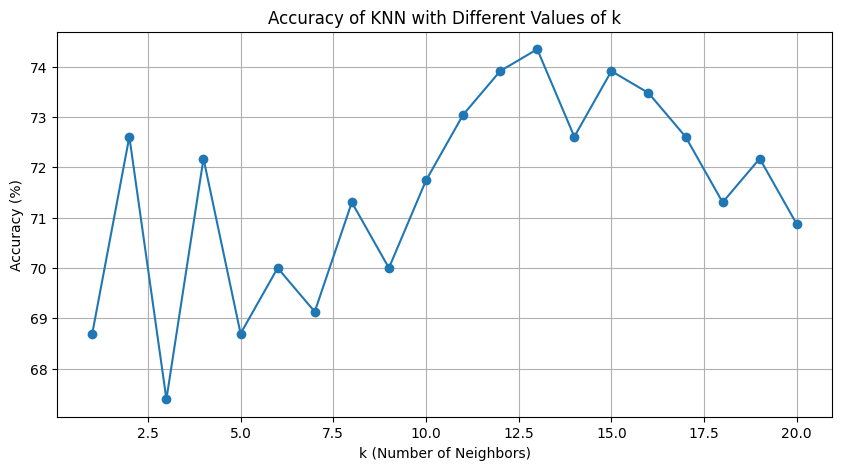

Experiment completed. Check the plot for the accuracy trend.


In [ ]:
import matplotlib.pyplot as plt
def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    """
    Run KNN predictions for different values of k and plot the accuracies.

    Arguments:
    X_train : np.ndarray
        The training feature matrix.
    y_train : np.ndarray
        The training labels.
    X_test : np.ndarray
        The test feature matrix.
    y_test : np.ndarray
        The test labels.
    k_values : list of int
        A list of k values to experiment with.

    Returns:
    dict
        A dictionary with k values as keys and their corresponding accuracies as values.
    """
    accuracies = {}

    for k in k_values:

        #predictions = complete code


        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy

        print(f"Accuracy for k={k}: {accuracy:.2f}%")


    plt.figure(figsize=(10, 5))
    plt.plot(k_values, list(accuracies.values()), marker='o')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Accuracy (%)')
    plt.title('Accuracy of KNN with Different Values of k')
    plt.grid(True)
    plt.show()

    return accuracies


k_values = range(1, 21)


try:
    accuracies = experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values)
    print("Experiment completed. Check the plot for the accuracy trend.")
except Exception as e:
    print(f"An unexpected error occurred during the experiment: {e}")
